# Método Congruente Linear
Gerando números pseudo-aleatórios  

Aluno: Lucas Alexandre Siqueira dos Santos

## O que o Método Congruente Linear? 
- O método congruente linear é um gerador de números aleatórios definido pela fórmula:

![](formula.png)

- Onde X é a sequência de números pseudo-aleatórios, m é o módulo (m>0), a é o multiplicador (a>0), c é o incremento (c>0) e Xo é a semente (valor inicial, 0 <= Xo <= m).

#### Características: 

- Uma das características desse gerador é o fato de que, a partir de uma certa sequência de números aleatórios gerados, essa sequência passa a se repetir infinitamente. O comprimento do ciclo gerado é chamado de período do gerador.
- Como os projetos de simulação geralmente utilizam muitos números aleatórios, é necessário que o período do gerador seja longo para evitar as repetições. Quando o período gerado é igual a m,dizemos que o gerador é de período completo. Contudo, note também que mesmo geradores com período completo podem gerar sequências não uniformes. 

#### Como definir os parâmetros do método?

- Um dos principais desafios para a utilização do Método Congruente Linear é definir seus parâmetros (m, a, c). O resultado ideal é aquele que, a partir deles, o método consiga gerar uma sequência de números ideal (período completo, como foi citado no tópico 1.1) que possua distribuição uniforme ao longo dessa sequência. 
- Um teorema, demonstrado por Hull e Dobell em 1962, mostra as condições para que m, a e c produzam um gerador com período completo:
    - m e c tem de ser primos entre si. Ou seja, o único inteiro positivo que divide m e c tem que ser 1.
    - a - 1 tem que ser divisivel por todos os fatores primos de m.
    - Se 4 divide m, então 4 tem que dividir a − 1.

## Implementação e testes
- Agora que já definimos o que é o Método Congruente Linear, falamos de suas características e vimos como definir seus parâmetros para obter um resultado satisfatório, vamos partir para implementação e o teste. 

#### Implementação:
- A implementação foi feita em python, e está contida no final desse relatório, com seus devidos comentários.  

#### Testes e análise:
- Vamos partir para os testes. Para isso, vamos definir alguns valores para a semente de nosso algoritmo. Defini os valores como: [3, 20, 50, 64, 132, 524, 925]. Esses valores foram definidos apenas para obtermos resultados distintos, para que pudessemos criar margens de erro para nossa implementação.

In [2]:
from main import CongruenteLinear as cl     #Classe do método gerador de números aleatórios
import matplotlib.pyplot as plt             #Apis usada para criação dos gráficos
import seaborn as sns                       
sementes = [3, 20, 50, 64, 132, 524, 925]

- Quais valores escolhi:
    - m: 1024 (2^10)
    - a: 17
    - b: 7
- Vemos que esses valores satisfazem o teorema citado. 
- Faltou citar anteriormente que dividir por m para obter o resto é uma operação aritmética lenta. Uma alternativa que evita esta divisão é utilizar m = 2^w para algum w (no nosso exemplo, w=10).

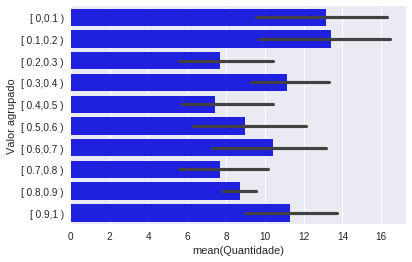

In [3]:
N = 100
teste01 = cl(1024,  17, 7)
for i in sementes:
    teste01.gerandoValoresAgrupados(N, i)
ax = sns.barplot(x="Quantidade", y="Valor agrupado", data=teste01.df, color='blue')

- Vemos que o teste acima, para uma sequência de 100 números aleatórios criados (100 para cada semente), gera uma distribuição ruim e com uma margem de erro grande (as sementes geraram distribuições consideravelmente diferentes). 

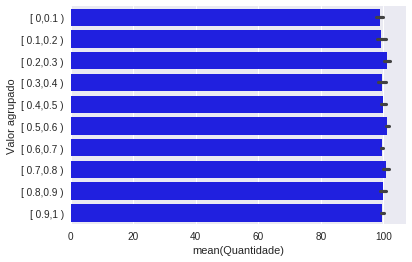

In [4]:
N = 1000
teste02 = cl(1024,  17, 7)
for i in sementes:
        teste02.gerandoValoresAgrupados(N, i)
ax = sns.barplot(x="Quantidade", y="Valor agrupado", data=teste02.df, color='blue')

- Já nesse segundo teste (N=1000), foi gerado números mais bem distribuídos e as diferentes sementes não influênciaram mais tanto no resultado final (margem de erro pequena). Será que se aumentarmos mais ainda o tamanho da sequência, essa distribuição fica ainda melhor? Veremos:

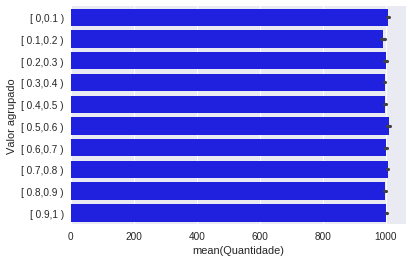

In [5]:
N = 10000
teste03 = cl(1024,  17, 7)
for i in sementes:
        teste03.gerandoValoresAgrupados(N, i)
ax = sns.barplot(x="Quantidade", y="Valor agrupado", data=teste03.df, color='blue')

- Vemos que sim, quanto maior o N, melhor é a distribuição dos resultados e menor é a margem de erro. Podemos crescer o valor de N até que a distribuição fique quase perfeita e a margem de erro seja praticamente nula.
- Porque isso acontece? Devido a lei dos grandes números.
    - A lei dos grandes números (LGN) é um teorema fundamental da teoria da probabilidade, que descreve o resultado da realização da mesma experiência repetidas vezes. De acordo com a LGN, a média aritmética dos resultados da realização da mesma experiência repetidas vezes tende a se aproximar do valor esperado à medida que mais tentativas se sucederem. Em outras palavras, quanto mais tentativas são realizadas, mais a probabilidade da média aritmética dos resultados observados irá se aproximar da probabilidade real.

#### Comparando resultados com a biblioteca numpy

- A biblioteca numpy também possue geradores de números aleatórios. O fato de escolher ela e não a função nativa do python, é apenas pelo fato dela já ter funções que retornam um vetor com valores aleatórios normalizados baseados em uma semente, deixando os códigos mais simples, direto e legível.

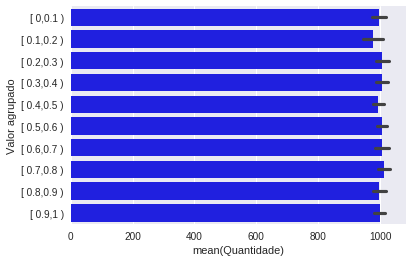

In [6]:
import numpy as np
from main import gerandoValoresAgrupadosOutClass
N = 10000
matriz_valores = []
for i in sementes:
    np.random.seed(i)
    matriz_valores.append(np.random.rand(N))
out = gerandoValoresAgrupadosOutClass(matriz_valores)
ax = sns.barplot(x="Quantidade", y="Valor agrupado", data=out, color='blue')

- Vemos que a distribuição, com o caso N=10000, ficou pior que o teste com nosso algoritmo. Isso talvez se de ao fato de que o período do algoritmo implementado no numpy ser bem maior do que o do nosso, fazendo com que a distribuição com um N relativamente pequeno não ser das melhores. Se aumentarmos ainda mais o valor de N, como veremos abaixo, iremos obter resultados mais satisfatórios.

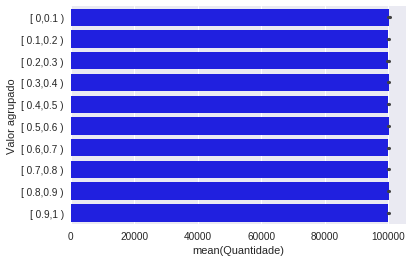

In [7]:
N = 1000000
matriz_valores = []
for i in sementes:
    np.random.seed(i)
    matriz_valores.append(np.random.rand(N))
out = gerandoValoresAgrupadosOutClass(matriz_valores)
ax = sns.barplot(x="Quantidade", y="Valor agrupado", data=out, color='blue')

- Como podemos ver, para N = 1000000, a distribuição fica quase perfeita e o erro praticamente nulo (em alguns casos a barra de erro é tão pequena que não é plotada no gráfico).